# Visualización de datos 

Datos tomados de los workloads

In [64]:
import pandas as pd
import numpy as np
import pdvega
import os
from pprint import pprint

from glob import glob

WORKING_DIR = '/home/mauri/proy/syspwr'
#TIME_FILES_DIR = os.path.join(WORKING_DIR,'tmfiles')
#TIME_SAVE_DIR = os.path.join(WORKING_DIR,'tmdata')
#PWR_FILES_DIR = os.path.join(WORKING_DIR,'pwrfiles')
#PWR_SAVE_DIR = os.path.join(WORKING_DIR,'pwrdata')

TIME_FILES_DIR = os.path.join(WORKING_DIR,'datashit')
TIME_SAVE_DIR = os.path.join(WORKING_DIR,'datashit')
PWR_FILES_DIR = os.path.join(WORKING_DIR,'datashit')
PWR_SAVE_DIR = os.path.join(WORKING_DIR,'datashit')


WORKLOADS = ['alexnet', 'autoenc', 'deepq', 'memnet', 'residual', 'seq2seq', 'vgg']
TYPES = ['cpusingle', 'cpu2', 'cpu3', 'cpu4', 'cpu5', 'cpu6', 'cpu7', 'cpu8', 'cpu9', 'cpu10']

data = {}

Seleccioná un workload:

In [65]:
WD = WORKLOADS[1]
print(WD)

autoenc


In [66]:
# ===== Load data =====
measure = {} # Power data
for tt in TYPES:
    all_data_pwr = np.zeros([1,10])
    for fname in glob(os.path.join(PWR_SAVE_DIR, WD+'_'+tt+'_*')):
        pwr_data = np.loadtxt(fname)
        # Check the file is not empty
        if pwr_data.shape == (0,):
            os.remove(ll)
            continue
        # Check the shape and fix it if it's not correct
        if pwr_data.shape == (10,):
            pwr_data = pwr_data.reshape([1,10])
        # Add to the rest
        all_data_pwr = np.concatenate((all_data_pwr,pwr_data))
    measure[tt]=all_data_pwr

teasure = {} # Time spent data
for tt in TYPES:
    all_data_time = np.zeros([1,7])
    for fname in glob(os.path.join(TIME_SAVE_DIR, WD+'_'+tt+'.*')):
        tm_data = np.loadtxt(fname)
        # Check the file is not empty
        if tm_data.shape == (0,):
            os.remove(ll)
            continue
        # Check the shape and fix it if it's not correct
        if tm_data.shape == (7,):
            tm_data = tm_data.reshape([1,7])
        # Add to the rest

        all_data_time = np.concatenate((all_data_time,tm_data))
    teasure[tt]=all_data_time

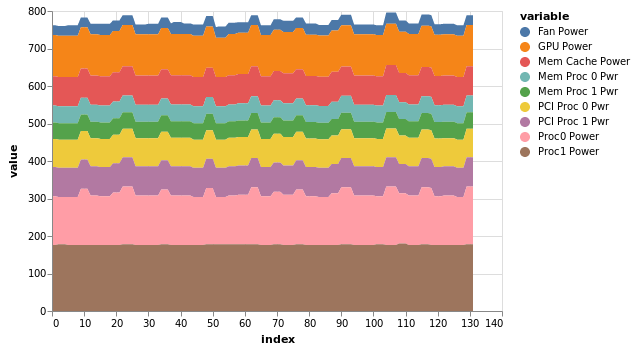

In [67]:
corecount = 5
tcc = TYPES[corecount-1]

plot_data = pd.DataFrame({'Fan Power':measure[tcc][1:,0],
                          'Mem Proc 0 Pwr':measure[tcc][1:,1],
                          'Mem Proc 1 Pwr':measure[tcc][1:,2],
                          'PCI Proc 0 Pwr':measure[tcc][1:,3],
                          'Mem Cache Power':measure[tcc][1:,4],
                          'Proc0 Power':measure[tcc][1:,5],
                          'Proc1 Power':measure[tcc][1:,6],
                          'PCI Proc 1 Pwr':measure[tcc][1:,7],
                          'GPU Power':measure[tcc][1:,9]})
plot_data.vgplot.area() #[['Proc0 Power', 'Proc1 Power']]

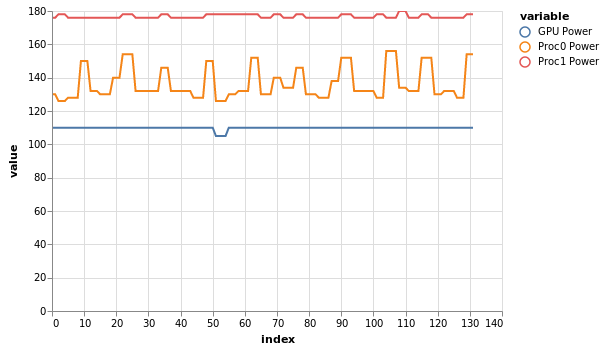

In [68]:
plot_data[['Proc0 Power', 'Proc1 Power', 'GPU Power']].vgplot()

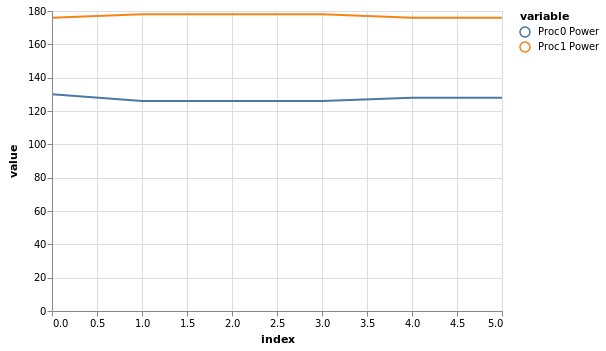

In [69]:
i = 0
start = int(teasure[tcc][i,6])+1
end = int(teasure[tcc][i+1,6])+1 # Elapsed wall time

single = pd.DataFrame({'Fan Power':measure[tcc][1:,0][start:end],
                       'Mem Proc 0 Pwr':measure[tcc][1:,1][start:end],
                       'Mem Proc 1 Pwr':measure[tcc][1:,2][start:end],
                       'PCI Proc 0 Pwr':measure[tcc][1:,3][start:end],
                       'Mem Cache Power':measure[tcc][1:,4][start:end],
                       'Proc0 Power':measure[tcc][1:,5][start:end],
                       'Proc1 Power':measure[tcc][1:,6][start:end],
                       'PCI Proc 1 Pwr':measure[tcc][1:,7][start:end],
                       'GPU Power':measure[tcc][1:,9][start:end]})

single[['Proc0 Power', 'Proc1 Power']].vgplot()

/home/mauri/anaconda3/envs/data_anal/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/mauri/anaconda3/envs/data_anal/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/mauri/anaconda3/envs/data_anal/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  


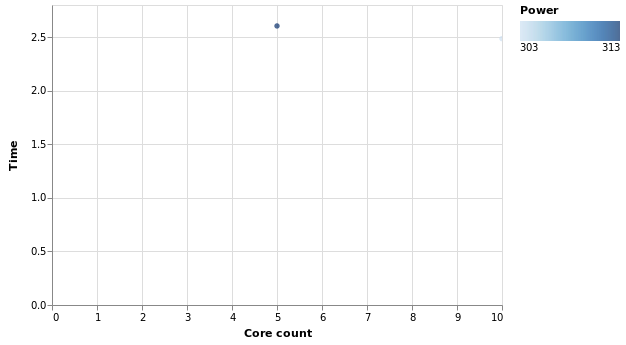

In [70]:
tmdata = [teasure[t][1:].mean(axis=0)[5] for t in TYPES]
pwrdata = [measure[t][1:].mean(axis=0)[5]+measure[t][1:].mean(axis=0)[6] for t in TYPES]

comparison = pd.DataFrame({'Time':tmdata,
                           'Power':pwrdata,
                           'Core count': [x for x in range(1,1+len(pwrdata))]})

comparison.vgplot.scatter('Core count', 'Time', 'Power')